# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
#!pip install citipy

In [3]:
 import matplotlib.pyplot as plt
 import pandas as pd
 import numpy as np
 import requests
 import time
 from scipy.stats import linregress
 import random
 from api_keys import weather_api_key


In [24]:
from citipy import citipy
import os 

## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

575

In [6]:
coords = [(random.random()*2.0, random.random()*2.0) for _ in range(10000)]

In [7]:
coords

[(0.8595153163466156, 0.3979106587407062),
 (1.3075425640199472, 0.9010374797658514),
 (1.9900067636532932, 0.26949624003782935),
 (1.447546973325417, 0.8800873420444875),
 (1.298784135420683, 1.3693684500608811),
 (1.2355346489252665, 0.5424193057613691),
 (0.35897738298620263, 1.503188202471309),
 (0.4511090633745596, 1.594497485291587),
 (1.0939820965833555, 0.5435458035432528),
 (0.17096288543317972, 1.9108657581947668),
 (0.4773755555530681, 0.24458214439262305),
 (1.4616402992830417, 1.0005393049880726),
 (0.23333749547561888, 1.9641054940009648),
 (1.1669058387279585, 0.3663814266675762),
 (0.2392413076179083, 0.13207108178198057),
 (1.7486691410477226, 0.6509814984699325),
 (0.6693613318927862, 1.2280845868894439),
 (1.758796930217382, 1.4956069063961155),
 (0.47106942712901523, 0.7442983622191315),
 (0.014396382176342648, 0.48105138147044935),
 (0.8047426886599616, 0.4693914850892227),
 (0.2786164999809071, 1.944058091060974),
 (0.023238613272873687, 1.267297955031361),
 (1.65

In [8]:
lat_lngs = []
cities = []
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

In [9]:
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    if city not in cities:
        cities.append(city) 
    
len(cities)

601

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [10]:
import json

In [11]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
city = "mar del plata"
query_url = f"{url}appid={weather_api_key}&units={units}&q="
response = requests.get(query_url + city).json()
print(json.dumps(response, indent=4))

{
    "coord": {
        "lon": -57.56,
        "lat": -38
    },
    "weather": [
        {
            "id": 500,
            "main": "Rain",
            "description": "light rain",
            "icon": "10d"
        }
    ],
    "base": "stations",
    "main": {
        "temp": 75.4,
        "feels_like": 73.99,
        "temp_min": 73.4,
        "temp_max": 78.01,
        "pressure": 1016,
        "humidity": 73
    },
    "visibility": 10000,
    "wind": {
        "speed": 12.75,
        "deg": 60
    },
    "rain": {
        "1h": 0.27
    },
    "clouds": {
        "all": 75
    },
    "dt": 1606148585,
    "sys": {
        "type": 1,
        "id": 8305,
        "country": "AR",
        "sunrise": 1606119867,
        "sunset": 1606171771
    },
    "timezone": -10800,
    "id": 3430863,
    "name": "Mar del Plata",
    "cod": 200
}


In [12]:
response['coord']['lon'],response['coord']['lat'], response['main']['temp_max'], response['clouds']['all'], response['wind']['speed']

(-57.56, -38, 78.01, 75, 12.75)

In [13]:
data = []
count = 0
s_count = 1
for city in cities:
    
    try:
        response = requests.get(query_url + city).json()
        weather_dict={
            "City": response['name'],
            "Latitude": response['coord']['lat'],
            "Longitude": response['coord']['lon'],
            "Max Temp": response['main']['temp_max'],
            "Humidity": response['main']['humidity'],
            "Cloudiness": response['clouds']['all'],
            "Wind Speed": response['wind']['speed'],
            "Country": response['sys']['country'],
             "Date": response['dt']
        }
        
        data.append(weather_dict)
       
        
        count += 1
        if count > 50:
            s_count += 1
            count = 1
        print(f'processing {count} of Set {s_count} | {city}')
    except:
        print(f"No data found for {city}")
        continue 


processing 1 of Set 1 | mataura
processing 2 of Set 1 | buala
processing 3 of Set 1 | yellowknife
processing 4 of Set 1 | jamestown
No data found for illoqqortoormiut
processing 5 of Set 1 | busselton
processing 6 of Set 1 | ushuaia
processing 7 of Set 1 | albany
processing 8 of Set 1 | marystown
processing 9 of Set 1 | bredasdorp
processing 10 of Set 1 | lebu
processing 11 of Set 1 | atar
No data found for tuggurt
processing 12 of Set 1 | airai
processing 13 of Set 1 | mardan
processing 14 of Set 1 | norman wells
processing 15 of Set 1 | carnarvon
No data found for lolua
processing 16 of Set 1 | atuona
processing 17 of Set 1 | saskylakh
processing 18 of Set 1 | new norfolk
processing 19 of Set 1 | jati
processing 20 of Set 1 | nikolskoye
No data found for mys shmidta
processing 21 of Set 1 | punta arenas
processing 22 of Set 1 | avarua
processing 23 of Set 1 | dawson
processing 24 of Set 1 | hermanus
processing 25 of Set 1 | puerto ayora
processing 26 of Set 1 | san cristobal
processi

No data found for grand centre
processing 21 of Set 5 | surt
processing 22 of Set 5 | srednekolymsk
processing 23 of Set 5 | nome
processing 24 of Set 5 | te anau
processing 25 of Set 5 | virginia beach
processing 26 of Set 5 | provideniya
processing 27 of Set 5 | hashtrud
processing 28 of Set 5 | vilyuysk
processing 29 of Set 5 | devin
processing 30 of Set 5 | marsa matruh
processing 31 of Set 5 | karaton
processing 32 of Set 5 | isangel
processing 33 of Set 5 | banda aceh
processing 34 of Set 5 | porto santo
processing 35 of Set 5 | acapulco
processing 36 of Set 5 | asau
No data found for belushya guba
processing 37 of Set 5 | alberton
processing 38 of Set 5 | rieti
processing 39 of Set 5 | severo-kurilsk
processing 40 of Set 5 | senneterre
processing 41 of Set 5 | tommot
processing 42 of Set 5 | izazi
processing 43 of Set 5 | nouakchott
processing 44 of Set 5 | lompoc
processing 45 of Set 5 | saint anthony
processing 46 of Set 5 | bull savanna
No data found for sentyabrskiy
processi

processing 42 of Set 9 | venezuela
processing 43 of Set 9 | marechal candido rondon
processing 44 of Set 9 | sambava
processing 45 of Set 9 | nambucca heads
processing 46 of Set 9 | galesong
processing 47 of Set 9 | harper
processing 48 of Set 9 | vernon
processing 49 of Set 9 | saint george
processing 50 of Set 9 | massena
processing 1 of Set 10 | bahia honda
processing 2 of Set 10 | yabrud
processing 3 of Set 10 | canby
processing 4 of Set 10 | lavrentiya
processing 5 of Set 10 | kamenka
processing 6 of Set 10 | anchorage
processing 7 of Set 10 | ravar
processing 8 of Set 10 | adrar
processing 9 of Set 10 | kurilsk
processing 10 of Set 10 | tres arroyos
processing 11 of Set 10 | ingham
processing 12 of Set 10 | ozernovskiy
processing 13 of Set 10 | sayat
processing 14 of Set 10 | vardo
processing 15 of Set 10 | black river
processing 16 of Set 10 | taree
processing 17 of Set 10 | bubaque
processing 18 of Set 10 | magan
processing 19 of Set 10 | fort-shevchenko
processing 20 of Set 10

In [ ]:
print (data)

In [ ]:
#data as of 7:52 AM (GMT); 11-22-2020
weather_df=pd.DataFrame(data)

In [14]:
weather_path = "data/weather.csv"
weather_df = pd.read_csv(weather_path)
weather_df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Puerto Ayora,-0.74,-90.35,71.01,81,93,7.00,EC,1606031446
1,Arraial do Cabo,-22.97,-42.03,71.69,79,84,9.69,BR,1606031527
2,Ridgecrest,35.62,-117.67,52.00,41,82,2.84,US,1606031510
3,Hermanus,-34.42,19.23,64.00,81,4,3.00,ZA,1606031528
4,Port Alfred,-33.59,26.89,69.10,72,100,15.57,ZA,1606031528


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [15]:
weather_df


,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Puerto Ayora,-0.74,-90.35,71.01,81,93,7.00,EC,1606031446
1,Arraial do Cabo,-22.97,-42.03,71.69,79,84,9.69,BR,1606031527
2,Ridgecrest,35.62,-117.67,52.00,41,82,2.84,US,1606031510
3,Hermanus,-34.42,19.23,64.00,81,4,3.00,ZA,1606031528
4,Port Alfred,-33.59,26.89,69.10,72,100,15.57,ZA,1606031528
...,...,...,...,...,...,...,...,...,...
563,Itoman,26.12,127.67,75.20,73,75,16.11,JP,1606031661
564,Zhengjiatun,43.51,123.51,12.52,93,0,5.23,CN,1606031662
565,Mandalgovi,45.76,106.27,12.72,87,0,11.45,MN,1606031662
566,Laguna,38.42,-121.42,44.60,81,1,1.01,US,1606031662


In [ ]:
Weather_df.to_csv("data/weather.csv",index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [16]:
weather_df

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Puerto Ayora,-0.74,-90.35,71.01,81,93,7.00,EC,1606031446
1,Arraial do Cabo,-22.97,-42.03,71.69,79,84,9.69,BR,1606031527
2,Ridgecrest,35.62,-117.67,52.00,41,82,2.84,US,1606031510
3,Hermanus,-34.42,19.23,64.00,81,4,3.00,ZA,1606031528
4,Port Alfred,-33.59,26.89,69.10,72,100,15.57,ZA,1606031528
...,...,...,...,...,...,...,...,...,...
563,Itoman,26.12,127.67,75.20,73,75,16.11,JP,1606031661
564,Zhengjiatun,43.51,123.51,12.52,93,0,5.23,CN,1606031662
565,Mandalgovi,45.76,106.27,12.72,87,0,11.45,MN,1606031662
566,Laguna,38.42,-121.42,44.60,81,1,1.01,US,1606031662


In [17]:
#  Get the indices of cities that have humidity over 100%.
veryhumid_df = weather_df[weather_df["Humidity"] >= 100]
   
veryhumid_df

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
22,Talnakh,69.49,88.40,23.00,100,75,11.18,RU,1606031533
48,Lelydorp,5.70,-55.23,75.00,100,40,1.12,SR,1606031539
97,Liberal,37.04,-100.92,39.20,100,90,9.17,US,1606031536
100,Hayden,47.77,-116.79,30.99,100,1,6.93,US,1606031552
103,Cayenne,4.93,-52.33,73.40,100,0,6.87,GF,1606031553
168,Nikolskoye,59.70,30.79,36.00,100,90,6.71,RU,1606031569
202,Maceió,-9.67,-35.74,69.80,100,0,4.70,BR,1606031577
314,Fortuna,40.60,-124.16,37.40,100,1,1.92,US,1606031603
315,El Reno,35.53,-97.95,46.99,100,90,13.87,US,1606031603
342,Itupiranga,-5.13,-49.33,75.20,100,0,1.36,BR,1606031609


In [18]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

clean_city_data = weather_df[weather_df['Humidity'] < 100] 
clean_city_data

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Puerto Ayora,-0.74,-90.35,71.01,81,93,7.00,EC,1606031446
1,Arraial do Cabo,-22.97,-42.03,71.69,79,84,9.69,BR,1606031527
2,Ridgecrest,35.62,-117.67,52.00,41,82,2.84,US,1606031510
3,Hermanus,-34.42,19.23,64.00,81,4,3.00,ZA,1606031528
4,Port Alfred,-33.59,26.89,69.10,72,100,15.57,ZA,1606031528
...,...,...,...,...,...,...,...,...,...
563,Itoman,26.12,127.67,75.20,73,75,16.11,JP,1606031661
564,Zhengjiatun,43.51,123.51,12.52,93,0,5.23,CN,1606031662
565,Mandalgovi,45.76,106.27,12.72,87,0,11.45,MN,1606031662
566,Laguna,38.42,-121.42,44.60,81,1,1.01,US,1606031662


In [19]:
clean_df = clean_city_data
clean_df

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Puerto Ayora,-0.74,-90.35,71.01,81,93,7.00,EC,1606031446
1,Arraial do Cabo,-22.97,-42.03,71.69,79,84,9.69,BR,1606031527
2,Ridgecrest,35.62,-117.67,52.00,41,82,2.84,US,1606031510
3,Hermanus,-34.42,19.23,64.00,81,4,3.00,ZA,1606031528
4,Port Alfred,-33.59,26.89,69.10,72,100,15.57,ZA,1606031528
...,...,...,...,...,...,...,...,...,...
563,Itoman,26.12,127.67,75.20,73,75,16.11,JP,1606031661
564,Zhengjiatun,43.51,123.51,12.52,93,0,5.23,CN,1606031662
565,Mandalgovi,45.76,106.27,12.72,87,0,11.45,MN,1606031662
566,Laguna,38.42,-121.42,44.60,81,1,1.01,US,1606031662


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [20]:
clean_df

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Puerto Ayora,-0.74,-90.35,71.01,81,93,7.00,EC,1606031446
1,Arraial do Cabo,-22.97,-42.03,71.69,79,84,9.69,BR,1606031527
2,Ridgecrest,35.62,-117.67,52.00,41,82,2.84,US,1606031510
3,Hermanus,-34.42,19.23,64.00,81,4,3.00,ZA,1606031528
4,Port Alfred,-33.59,26.89,69.10,72,100,15.57,ZA,1606031528
...,...,...,...,...,...,...,...,...,...
563,Itoman,26.12,127.67,75.20,73,75,16.11,JP,1606031661
564,Zhengjiatun,43.51,123.51,12.52,93,0,5.23,CN,1606031662
565,Mandalgovi,45.76,106.27,12.72,87,0,11.45,MN,1606031662
566,Laguna,38.42,-121.42,44.60,81,1,1.01,US,1606031662


In [21]:
lat = clean_df.iloc[:, 2]
temp = clean_df.iloc[:, 3]
lat

0      -90.35
1      -42.03
2     -117.67
3       19.23
4       26.89
        ...  
563    127.67
564    123.51
565    106.27
566   -121.42
567    134.26
Name: Longitude, Length: 555, dtype: float64

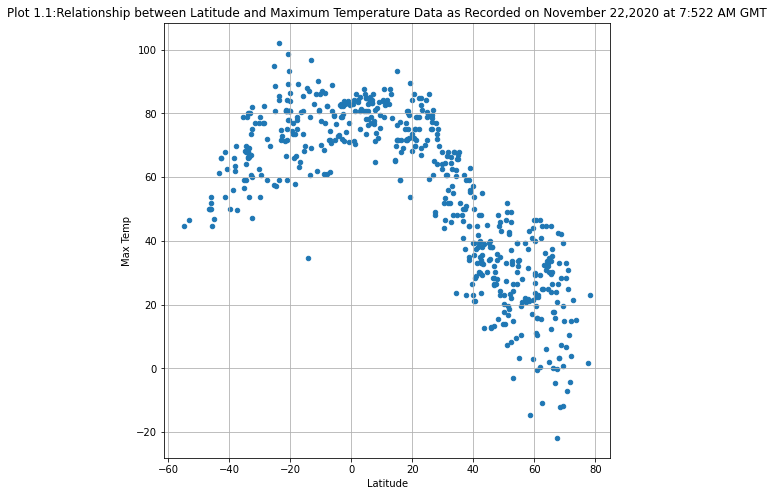

In [43]:
clean_df.plot(kind="scatter", x="Latitude", y="Max Temp", grid=True, figsize=(8,8),
              title="Plot 1.1:Relationship between Latitude and Maximum Temperature Data as Recorded on November 22,2020 at 7:522 AM GMT")
plt.savefig("Plots/Plot 1-1.png")
plt.show()

In [23]:
#Plot 1.1: This plot shows what might be called a U-dhaped curve where temperaures are recordedto be highest around the equator (0) with a decline as one moves north or south to higher latitudes. 

## Latitude vs. Humidity Plot

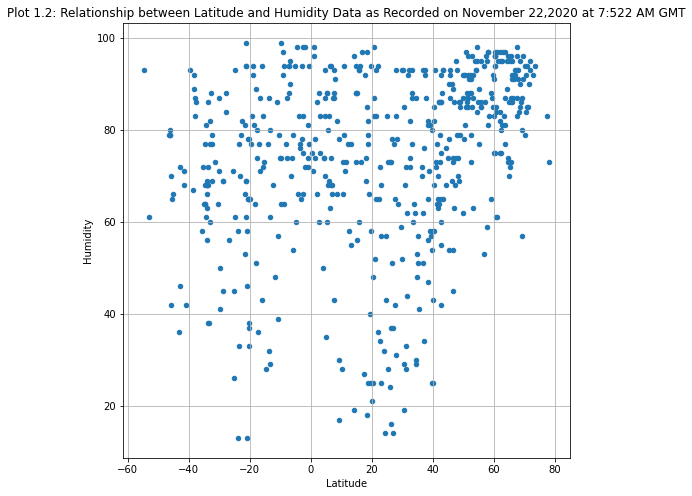

In [44]:
clean_df.plot(kind="scatter", x="Latitude", y="Humidity", grid=True, figsize=(8,8),
              title="Plot 1.2: Relationship between Latitude and Humidity Data as Recorded on November 22,2020 at 7:522 AM GMT")
plt.savefig("Plots/Plot 1-2.png")
plt.show()

In [ ]:
#Plot 1.2: The plot of humidity against latitude is considerably noisier with no vible trend at face-value

## Latitude vs. Cloudiness Plot

In [ ]:
clean_df

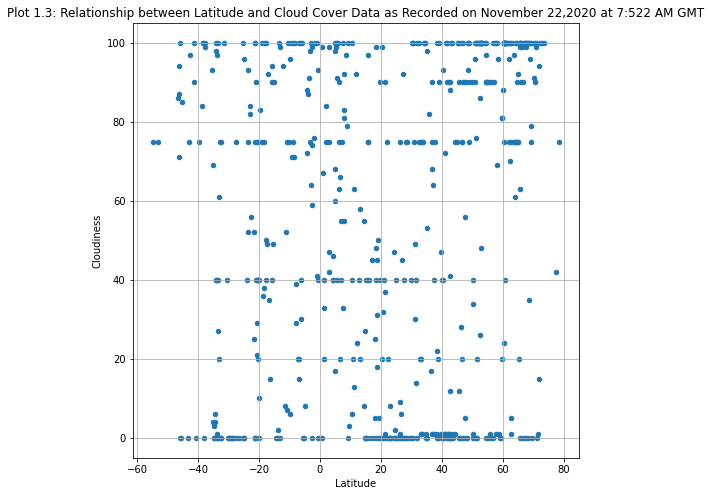

In [45]:
clean_df.plot(kind="scatter", x="Latitude", y="Cloudiness", grid=True, figsize=(8,8),
              title="Plot 1.3: Relationship between Latitude and Cloud Cover Data as Recorded on November 22,2020 at 7:522 AM GMT")
plt.savefig("Plots/Plot 1-3.png")
plt.show()

In [ ]:
#Plot 1.3: Recorded cloud cover is more peculiar. There are observable clusters at 20, 40, and 80 percent cloyd cover; but these appear to have no relation to latitude. At least mathematically, there appears to be a different variable at work, 

## Latitude vs. Wind Speed Plot

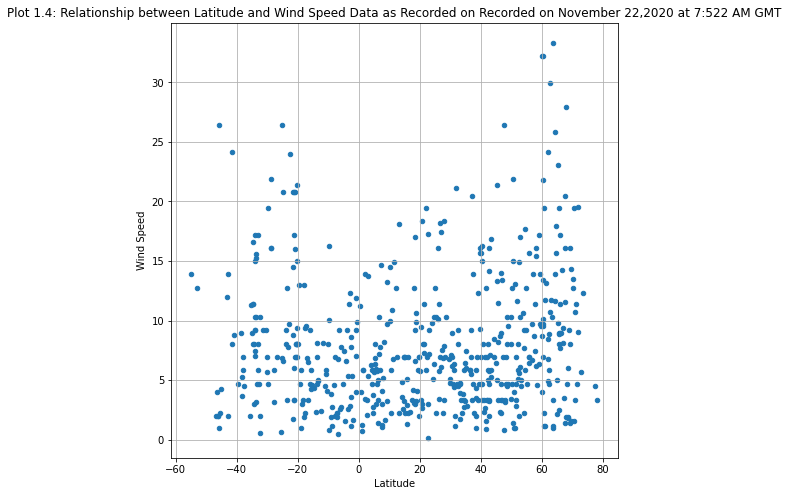

In [46]:
clean_df.plot(kind="scatter", x="Latitude", y="Wind Speed", grid=True, figsize=(8,8),
              title="Plot 1.4: Relationship between Latitude and Wind Speed Data as Recorded on Recorded on November 22,2020 at 7:522 AM GMT")
plt.savefig("Plots/Plot 1-4.png")
plt.show()

In [ ]:
#Plot 1.4: Once again, there is no visually discernible trend for wind speed vis-a-vis latitude in this plot

## Linear Regression

In [26]:
North_df = clean_df[clean_df["Latitude"] >= 0]
North_df

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,Ridgecrest,35.62,-117.67,52.00,41,82,2.84,US,1606031510
7,Hong Kong,22.29,114.16,84.99,65,20,6.93,HK,1606031498
8,Andra,62.51,65.89,24.75,95,1,8.86,RU,1606031529
9,Bairiki Village,1.33,172.98,80.60,78,20,5.82,KI,1606031529
12,Hilo,19.73,-155.09,73.40,94,90,6.93,US,1606031530
...,...,...,...,...,...,...,...,...,...
563,Itoman,26.12,127.67,75.20,73,75,16.11,JP,1606031661
564,Zhengjiatun,43.51,123.51,12.52,93,0,5.23,CN,1606031662
565,Mandalgovi,45.76,106.27,12.72,87,0,11.45,MN,1606031662
566,Laguna,38.42,-121.42,44.60,81,1,1.01,US,1606031662


In [27]:
South_df = clean_df[clean_df["Latitude"] <= 0]
South_df

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Puerto Ayora,-0.74,-90.35,71.01,81,93,7.00,EC,1606031446
1,Arraial do Cabo,-22.97,-42.03,71.69,79,84,9.69,BR,1606031527
3,Hermanus,-34.42,19.23,64.00,81,4,3.00,ZA,1606031528
4,Port Alfred,-33.59,26.89,69.10,72,100,15.57,ZA,1606031528
5,Atuona,-9.80,-139.03,77.59,74,6,16.22,PF,1606031528
...,...,...,...,...,...,...,...,...,...
535,Borba,-4.39,-59.59,72.79,98,88,1.59,BR,1606031655
545,Ankazobe,-18.32,47.12,73.40,64,75,3.36,MG,1606031657
546,Springbok,-29.66,17.89,60.80,41,0,4.70,ZA,1606031657
547,Ballina,-28.87,153.57,77.00,69,0,16.11,AU,1606031657


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [88]:
ntemp = North_df["Max Temp"],
nlat = North_df["Latitude"],
nhum = North_df["Humidity"],
ncld = North_df["Cloudiness"],
nwind = North_df["Wind Speed"],
nlat

(2      35.62
 7      22.29
 8      62.51
 9       1.33
 12     19.73
        ...  
 563    26.12
 564    43.51
 565    45.76
 566    38.42
 567     7.04
 Name: Latitude, Length: 385, dtype: float64,)

In [148]:
from scipy import stats
from sklearn.linear_model import LinearRegression

In [106]:
x_values = North_df["Latitude"]
y_values = North_df["Max Temp"]
fit = x_values * slope + intercept
eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
eq

'y = -1.11x + 90.62'

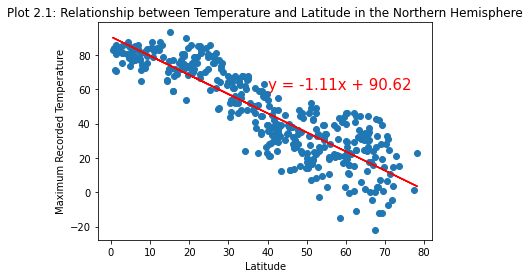

In [115]:
plt.scatter(nlat,ntemp)
plt.title("Plot 2.1: Relationship between Temperature and Latitude in the Northern Hemisphere")
plt.plot(x_values,regress_values,"r-")
plt.annotate(eq,(40,60),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Maximum Recorded Temperature')
plt.savefig("Plots/Plot 2-1.png")
plt.show()

In [ ]:
#Plot 2.1: with data from just one hemisphere, latitude and temperature begin to appear to have a strong consistent relationship. From the plot, it appears to be a negative correlation where temperature falls as one approaches higher latitudes.  

In [144]:
slope, intercept, r_value, p_value, std_err = stats.linregress(nlat,ntemp)
r_squared = r_value ** 2
r_squared2 = round(r_squared,3)
r = round(r_value,3)
m = round(slope,3)
b = round(intercept,3)
print(f"the  pearson r is {r_value}")
print (f"the y-intercept is {intercept}")
print (f"the slope is {slope}")
print(f"The coefficient of determination is {r_squared}")
print(f"The equation of the line is: {eq} r = {r}; r^2 = {r_squared2}")

the  pearson r is -0.8765714793938462
the y-intercept is 90.61996996326494
the slope is -1.1142412365952359
The coefficient of determination is 0.7683775584867161
The equation of the line is: y = 0.34x + 61.53 r = -0.877; r^2 = 0.768


In [ ]:
r=-0.8765714793938462;r^2=0.7683775584867161 Y= (x*-1.1142412365952359)+90.61996996326494

In [ ]:
#Equation 2.1
#Equation 3.1: As with Equation 2.1 in the Northern Hemisphere, the mathematical relationship between Latitude and Temperature is equally robust in the Southern Hemisphere (r=-0.877)m 
#The regression equation, with a coefficient of determination of 0.768, this equation accounts for 76.84 percent of the variance in temepratures calculated from the mean temperature value. 
#Assuming no other variables are t work in determining temperature, this eqation predicts an average temperature of 90.62F at the Equator with an average decrease of 1.114F fo every degree of latitude one moves north.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

In [196]:
slope, intercept, r_value, p_value, std_err = stats.linregress(slat,stemp)
x_values = South_df["Latitude"]
y_values = South_df["Max Temp"]
fit = x_values * slope + intercept
eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
eq

'y = 0.5x + 83.23'

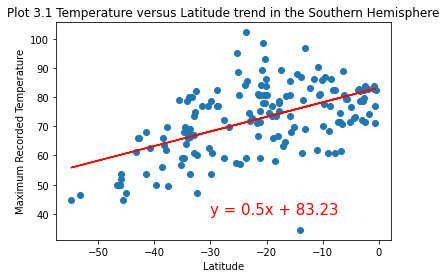

In [193]:
plt.scatter(slat,stemp)
plt.title("Plot 3.1 Temperature versus Latitude trend in the Southern Hemisphere")
plt.plot(x_values,fit,"r-")
plt.annotate(eq,(-30,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Maximum Recorded Temperature')
plt.savefig("Plots/Plot 3-1.png")
plt.show()

In [ ]:
#Plot 3.1: This plot mirrors Plot 2.1 in showing a clear correlation between lower latitudes and higher temperatures; but this plot demonstrates the same trend for negative southern latitudes. 

In [122]:
stemp = South_df["Max Temp"],
slat = South_df["Latitude"],
shum = South_df["Humidity"],
scld = South_df["Cloudiness"],
swind = South_df["Wind Speed"],
slat

(0      -0.74
 1     -22.97
 3     -34.42
 4     -33.59
 5      -9.80
        ...  
 535    -4.39
 545   -18.32
 546   -29.66
 547   -28.87
 551   -32.95
 Name: Latitude, Length: 170, dtype: float64,)

In [199]:
slope, intercept, r_value, p_value, std_err = stats.linregress(slat,stemp)
r_squared = r_value ** 2
r_squared2 = round(r_squared,3)
r = round(r_value,3)
m = round(slope,3)
b = round(intercept,3)
print(f"the  pearson r is {r_value}")
print (f"the y-intercept is {intercept}")
print (f"the slope is {slope}")
print(f"The coefficient of determination is {r_squared}")
print(f"The equation of the line is: {eq}; r = {r}; r^2 = {r_squared2}")

the  pearson r is 0.5457294777192876
the y-intercept is 83.22765169646601
the slope is 0.49952934652620423
The coefficient of determination is 0.2978206628517664
The equation of the line is: y = 0.5x + 83.23; r = 0.546; r^2 = 0.298


In [ ]:
#Equation 3.1: As with Equation 2.1 in the Northern Hemisphere, the mathematical relationship between Latitude and Temperature is robust, albeit weaker, in the Southern Hemisphere (r=0.546). 
#The regression equation, with a coefficient of determination of 0.298, this equation accounts for 29.78 percent of the variance in temepratures calculated from the mean temperature value. 
#Assuming no other variables are t work in determining temperature, this eqation predicts an average temperature of 83.228F at the Equator with an average decrease of 0.499F fo every degree of latitude one moves south. 

In [170]:
from scipy import stats
from sklearn.linear_model import LinearRegression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [200]:
slope, intercept, r_value, p_value, std_err = stats.linregress(nlat,nhum)
x_values = North_df["Latitude"]
y_values = North_df["Humidity"]
fit = x_values * slope + intercept
eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
eq

'y = 0.34x + 61.53'

In [ ]:
North_df.plot(kind="scatter", x="Latitude", y="Humidity", grid=True, figsize=(8,8),
              title="Plot 2.2:Humidity versus Latitude Trend in the Northern Hemisphere")
plt.show()

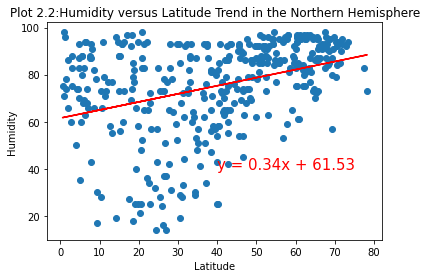

In [178]:
plt.scatter(nlat,nhum)
plt.title("Plot 2.2:Humidity versus Latitude Trend in the Northern Hemisphere")
plt.plot(x_values,fit,"r-")
plt.annotate(eq,(40,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig("Plots/Plot 2-2.png")
plt.show()

In [ ]:
#Plot 2.Focusing on humidity data from one hemisphere reveals a potential trend overlooked in Plot 1.2. In lower latitudes in the Northern Hemisphere, humidoty appears to have a large amount of dispersion between low and high values owing to the presence of both tropical rainforests and large deserts ibetween 10 and 30 degrees Latitude. In higher northern latitudes, this dispersion gives way to relatively uniform high amounts of humidity 

In [202]:
slope, intercept, r_value, p_value, std_err = stats.linregress(nlat,nhum)
r_squared = r_value ** 2
r_squared2 = round(r_squared,3)
r = round(r_value,3)
m = round(slope,3)
b = round(intercept,3)
print(f"the  pearson r is {r_value}")
print (f"the y-intercept is {intercept}")
print (f"the slope is {slope}")
print(f"The coefficient of determination is {r_squared}")
print(f"The equation of the line is: {eq}; r = {r}; r^2 = {r_squared2}")

the  pearson r is 0.35417385960244985
the y-intercept is 61.531499084624066
the slope is 0.3431878893027221
The coefficient of determination is 0.12543912282569586
The equation of the line is: y = 0.34x + 61.53; r = 0.354; r^2 = 0.125


In [ ]:
r=0.35417385960244985;r^2=0.2978206628517664 Y= (x*0.36990215418447553)+58.87474174614395

In [ ]:
#Equation 1.2: While not as strong as the relationship between temperature, and latitude; there is evidence of a moderate positive relationship between humidity and latitude in the Northern Hemisphere (r=0.3542)
#With a coefficient of determination of 0.2978, this relationship accounts for 29.782 percent of the variance in recorded humidity in the Northern Hemisphere. 
#At the Equator, this equation predicts an average humidity of 61.531 percent; and expects an average increase of 0.354 percent for every degree of laitude one moves further north. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

In [203]:
slope, intercept, r_value, p_value, std_err = stats.linregress(slat,shum)
x_values = South_df["Latitude"]
y_values = South_df["Humidity"]
fit = x_values * slope + intercept
eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
eq

'y = 0.24x + 75.65'

In [ ]:
South_df.plot(kind="scatter", x="Latitude", y="Humidity", grid=True, figsize=(8,8),
              title="Plot 3.2:Humidity versus Latitude Trend in the Southern Hemisphere")
plt.show()

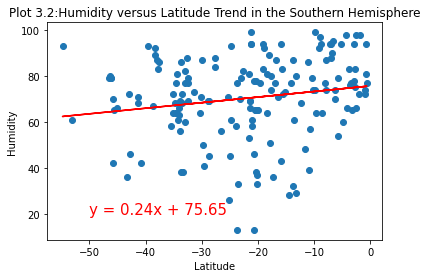

In [176]:
plt.scatter(slat,shum)
plt.title("Plot 3.2:Humidity versus Latitude Trend in the Southern Hemisphere")
plt.plot(x_values,fit,"r-")
plt.annotate(eq,(-50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig("Plots/Plot 3-2.png")
plt.show()

In [ ]:
#Plot 3.2: Unlike with temperature, the trend for humidity in the Southern Hemisphere does not mirror that in the Northern Hemisphere (plot 2.2). The dispersions appear to be fairly random with no clear trend standing out; although humidity appers to be cosistently high throughout the Southern Hemisphere regardless of latitude. 

In [205]:
slope, intercept, r_value, p_value, std_err = stats.linregress(slat,shum)
r_squared = r_value ** 2
r_squared2 = round(r_squared,3)
r = round(r_value,3)
m = round(slope,3)
b = round(intercept,3)
print(f"the  pearson r is {r_value}")
print (f"the y-intercept is {intercept}")
print (f"the slope is {slope}")
print(f"The coefficient of determination is {r_squared}")
print(f"The equation of the line is: {eq}; r = {r}; r^2 = {r_squared2}")

the  pearson r is 0.17649269653025648
the y-intercept is 75.65129537088524
the slope is 0.24269366456102734
The coefficient of determination is 0.031149671928521208
The equation of the line is: y = 0.24x + 75.65; r = 0.176; r^2 = 0.031


In [ ]:
#Equation 2.2: The relationship between humidity and latitude in the Southern Hemisphere is a fairly weak positive one (r=0.1765) in that humidity tends to rise slightly, on average, with higher latitudes going north. 
#With a coefficient of determination of 0.0311, this weak relationship accounts for only 3.111 percent of the variability in humidity in the Southern Hemisphere. 
#On average, the data expects an average of 65.129 percent humidity at the Equator; and predics an average increase of 24.27percent in humidity for every degree of latitude one moves further south, 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [206]:
slope, intercept, r_value, p_value, std_err = stats.linregress(nlat,ncld)
x_values = North_df["Latitude"]
y_values = North_df["Cloudiness"]
fit = x_values * slope + intercept
eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
eq

'y = 0.51x + 33.58'

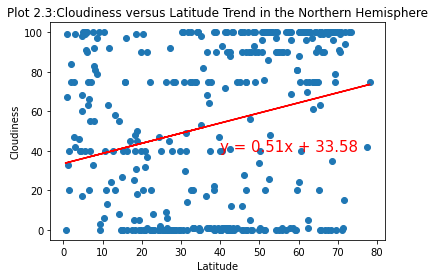

In [173]:
plt.scatter(nlat,ncld)
plt.title("Plot 2.3:Cloudiness versus Latitude Trend in the Northern Hemisphere")
plt.plot(x_values,fit,"r-")
plt.annotate(eq,(40,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig("Plots/Plot 2-3.png")
plt.show()

In [ ]:
North_df.plot(kind="scatter", x="Latitude", y="Cloudiness", grid=True, figsize=(8,8),
              title="Plot 2.3:Cloudiness versus Latitude Trend in the Northern Hemisphere")
plt.show()

In [ ]:
#Plot 2.3 des not show much difference from Plot 1.3. Cloudiness in the Northern Hemisphere still pretty much appears in 
#clusters that seem to have nothing to do with latitude. 

In [207]:
slope, intercept, r_value, p_value, std_err = stats.linregress(nlat,ncld)
r_squared = r_value ** 2
r_squared2 = round(r_squared,3)
r = round(r_value,3)
m = round(slope,3)
b = round(intercept,3)
print(f"the  pearson r is {r_value}")
print (f"the y-intercept is {intercept}")
print (f"the slope is {slope}")
print(f"The coefficient of determination is {r_squared}")
print(f"The equation of the line is: {eq}; r = {r}; r^2 = {r_squared2}")

the  pearson r is 0.2567767679022564
the y-intercept is 33.57912464498453
the slope is 0.511903028718486
The coefficient of determination is 0.06593430853432924
The equation of the line is: y = 0.51x + 33.58; r = 0.257; r^2 = 0.066


In [ ]:
#Equation 1.3: The best way to summarizre the relationship between cloudiness and latitude IN THE NORTHERN HEMISPHERE is that it barely exists at all. (r=0.257)
# The coefficient of determination for this linear relatonship is 0.066 which means the relationship between latitude and variability in the Northern Hemisphere only accounts for 6.5934 percent of the total variability measured in cloudiness. 
# At the equator, the regression equation expects, on average, about 53.5791 percent cloudy skies with an average increase of .5119 percent for every degree one moves further north.  

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

In [208]:
slope, intercept, r_value, p_value, std_err = stats.linregress(slat,scld)
x_values = South_df["Latitude"]
y_values = South_df["Cloudiness"]
fit = x_values * slope + intercept
eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
eq

'y = 0.24x + 56.62'

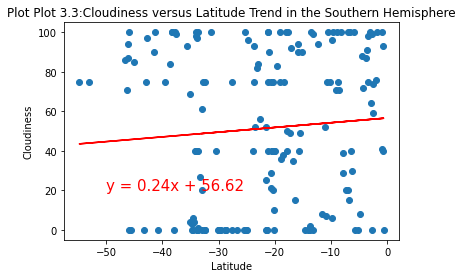

In [180]:
plt.scatter(slat,scld)
plt.title("Plot Plot 3.3:Cloudiness versus Latitude Trend in the Southern Hemisphere")
plt.plot(x_values,fit,"r-")
plt.annotate(eq,(-50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig("Plots/Plot 3-3.png")
plt.show()

In [ ]:
#Plot 3.3: This plot echoes Plot 2.3 from the Northern Hemisphere in that there is no discernable trend. There are fewer clusters in Southern Hemisphere data ; but these clusters still appear to have little to do with cloudiness. 

In [209]:
slope, intercept, r_value, p_value, std_err = stats.linregress(slat,scld)
r_squared = r_value ** 2
r_squared2 = round(r_squared,3)
r = round(r_value,3)
m = round(slope,3)
b = round(intercept,3)
print(f"the  pearson r is {r_value}")
print (f"the y-intercept is {intercept}")
print (f"the slope is {slope}")
print(f"The coefficient of determination is {r_squared}")
print(f"The equation of the line is: {eq}; r = {r}; r^2 = {r_squared2}")

the  pearson r is 0.08059088579325394
the y-intercept is 56.623921668965544
the slope is 0.23878442007030745
The coefficient of determination is 0.006494890872941299
The equation of the line is: y = 0.24x + 56.62; r = 0.081; r^2 = 0.006


In [ ]:
r0.08059088579325394;r^2=0.006494890872941299 Y= (x*0.23878442007030745)+56.623921668965544

In [ ]:
#Equation 2.3: IN THE SOUTHERN HEMISPHERE, the statistical relationship between latitude and cloudiness is even weaker(r=0.806)
#The coefficient of determination of 0.00649 means thatthis relationship barely improves on the mean in terms of explaining the variability in cloudiness. The regression equatione xpects, on average, 56.624 percent cloud cover at the Equator
#with an expect edrise of 0.239 percent in cloudiness for everydegree in latitude one moves further south.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [210]:
slope, intercept, r_value, p_value, std_err = stats.linregress(nlat,nwind)
x_values = North_df["Latitude"]
y_values = North_df["Wind Speed"]
fit = x_values * slope + intercept
eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
eq

'y = 0.07x + 5.27'

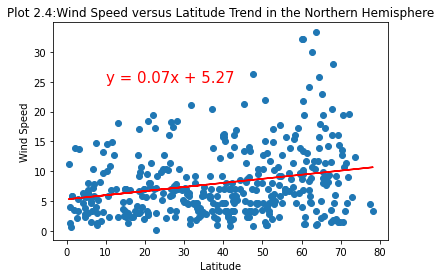

In [184]:
plt.scatter(nlat,nwind)
plt.title("Plot 2.4:Wind Speed versus Latitude Trend in the Northern Hemisphere")
plt.plot(x_values,fit,"r-")
plt.annotate(eq,(10,25),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.savefig("Plots/Plot 2-4.png")
plt.show()

In [ ]:
#Plot 2.4: High wind sppeds are often associated with abnormally destructive events; but they appear to be fairly common between 60 and 70 degrees in Northern Latitude. This makes more sense when one considrs these ;atitudes to coincide with the vast empty expanses of Canada and Siberia, both known fors trong intertime Northern winds.Regardless, wind speed appears to be largely independent of latitude; and appears toremain consistently below 10 mph for most cases.  

In [ ]:
slope, intercept, r_value, p_value, std_err = stats.linregress(nlat,nwind)
r_squared = r_value ** 2
print(f"the  pearson r is {r_value}")
print (f"the y-intercept is {intercept}")
print (f"the slope is {slope}")
print(f"The coefficient of determination is {r_squared}")

In [213]:
slope, intercept, r_value, p_value, std_err = stats.linregress(nlat, nwind)
r_squared = r_value ** 2
r_squared2 = round(r_squared,3)
r = round(r_value,3)
m = round(slope,3)
b = round(intercept,3)
print(f"the  pearson r is {r_value}")
print (f"the y-intercept is {intercept}")
print (f"the slope is {slope}")
print(f"The coefficient of determination is {r_squared}")
print(f"The equation of the line is: {eq}; r = {r}; r^2 = {r_squared2}")

the  pearson r is 0.24536491813204708
the y-intercept is 5.273958803216015
the slope is 0.06882419371933471
The coefficient of determination is 0.06020394304994617
The equation of the line is: y = 0.07x + 5.27; r = 0.245; r^2 = 0.06


In [ ]:
#Equation 1.4: There is a weak statistical relationship between Wind Speed and Latitude in the Northern Hemisphere as these two variables appear to have a weak positive correlation. (r=0.245)
#With a coefficient of determination of 0.0602, this regression only corrects 6.02 percent of the total deviation from the mean wind speed.  
#This regression equation predicts an average wind speed of 5.274mph at the Equator; and expects an average increase of 0.0688mph for every degree in Latitude one moves further north. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

In [214]:
slope, intercept, r_value, p_value, std_err = stats.linregress(slat,swind)
x_values = South_df["Latitude"]
y_values = South_df["Wind Speed"]
fit = x_values * slope + intercept
eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
eq

'y = -0.09x + 5.82'

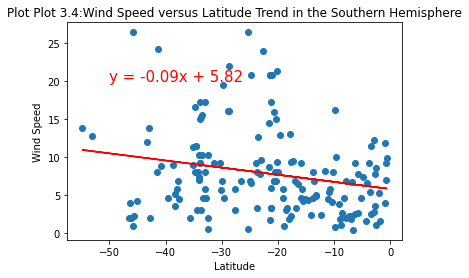

In [190]:
plt.scatter(slat,swind)
plt.title("Plot Plot 3.4:Wind Speed versus Latitude Trend in the Southern Hemisphere")
plt.plot(x_values,fit,"r-")
plt.annotate(eq,(-50,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.savefig("Plots/Plot 3-4.png")
plt.show()

In [ ]:
#Plot 3.4: As in the Northern Hemisphere, wind speeds below 10mph ppear to be the norm in the Southern Hemisphere as well. The interesting exception
#being the narrow band between -30 and -40 degrees in Latitude. These latitudes overlap with significant expanses of ocean, which is one possible explanation
#Africa's savannah, South America's Pampas, and Australia's desert may also account for some of this deviation. 

In [ ]:
slope, intercept, r_value, p_value, std_err = stats.linregress(slat,swind)
r_squared = r_value ** 2
print(f"the  pearson r is {r_value}")
print (f"the y-intercept is {intercept}")
print (f"the slope is {slope}")
print(f"The coefficient of determination is {r_squared}")

In [215]:
slope, intercept, r_value, p_value, std_err = stats.linregress(slat,swind)
r_squared = r_value ** 2
r_squared2 = round(r_squared,3)
r = round(r_value,3)
m = round(slope,3)
b = round(intercept,3)
print(f"the  pearson r is {r_value}")
print (f"the y-intercept is {intercept}")
print (f"the slope is {slope}")
print(f"The coefficient of determination is {r_squared}")
print(f"The equation of the line is: {eq}; r = {r}; r^2 = {r_squared2}")

the  pearson r is -0.21887730644530365
the y-intercept is 5.821266962567628
the slope is -0.09361375732333356
The coefficient of determination is 0.047907275276751364
The equation of the line is: y = -0.09x + 5.82; r = -0.219; r^2 = 0.048


In [ ]:
#Equation 2.4: the following equation demonstrates that wind speed and latitude share only a weak, if any, mathematical relationship in this dataset (r=-0.219)
#With a coefficient of determination of 0.048, this regressionn equation explains only 4.79 percent of the variability in wind speedcalculated from the mean wind speed, and suggests that this contribution may have been arrived at by chance.
#The equation predicts that wind speed would be 5.821 miles per hour at the Equator and expects a decrease of 0.0936 mph for every degree further south one measures. 